In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
with open('data.json', 'r') as f:
    data = json.load(f)
    data = data[list(data.keys())[0]] # flatten the sturcture and remove irrelevant information
print(data)

{'attributes': {'configname': 'General', 'datetime': '20241128-13:42:26', 'datetimef': '20241128-134226', 'experiment': 'General', 'inifile': 'omnetpp.ini', 'iterationvars': '', 'iterationvarsd': '', 'iterationvarsf': '', 'measurement': '', 'network': 'tsn.TSN_Network', 'processid': '73682', 'repetition': '0', 'replication': '#0', 'resultdir': 'results', 'runnumber': '0', 'seedset': '0'}, 'itervars': {}, 'config': [{'image-path': '../inet4.5/images'}, {'network': 'tsn.TSN_Network'}, {'sim-time-limit': '1.0s'}, {'*.visualizer.typename': 'IntegratedMultiCanvasVisualizer'}, {'*.visualizer.numNetworkRouteVisualizers': '1'}, {'*.visualizer.networkRouteVisualizer[*].displayRoutes': 'true'}, {'*.visualizer.networkRouteVisualizer[0].packetFilter': '"\\"ats*\\""'}, {'*.visualizer.networkRouteVisualizer[0].lineColor': '"red1"'}, {'*.*.eth[*].bitrate': '1Gbps'}, {'*.*.bridging.directionReverser.delayer.typename': 'PacketDelayer'}, {'*.*.bridging.directionReverser.delayer.delay': '8us'}, {'*.ES_1.

# Explore JSON Structure
Print and explore the structure of the JSON data to understand its contents.

In [35]:
# Explore JSON Structure

# Print the keys of the JSON data to understand its structure
print("Keys in the JSON data:", data.keys())

# Explore the structure of a specific key (e.g., the first key)
first_key = list(data.keys())[0]
print(f"\nStructure of the data under the key '{first_key}':")
print(json.dumps(data[first_key], indent=4))

# If the data contains a list of dictionaries, print the keys of the first dictionary
if isinstance(data[first_key], list) and len(data[first_key]) > 0:
    print(f"\nKeys in the first dictionary under the key '{first_key}':")
    print(data[first_key][0].keys())

Keys in the JSON data: dict_keys(['attributes', 'itervars', 'config', 'histograms'])

Structure of the data under the key 'attributes':
{
    "configname": "General",
    "datetime": "20241128-13:42:26",
    "datetimef": "20241128-134226",
    "experiment": "General",
    "inifile": "omnetpp.ini",
    "iterationvars": "",
    "iterationvarsd": "",
    "iterationvarsf": "",
    "measurement": "",
    "network": "tsn.TSN_Network",
    "processid": "73682",
    "repetition": "0",
    "replication": "#0",
    "resultdir": "results",
    "runnumber": "0",
    "seedset": "0"
}


# Extract Specific Data
Extract specific data from the JSON structure, such as 'binedges' and 'binvalues'.

In [43]:
# Extract Specific Data

# Function to extract 'binedges' and 'binvalues' from the JSON data
def extract_binedges_binvalues(data):
    extracted_data = []
    for item in data['histograms']:
        if 'binedges' in item and 'binvalues' in item:
            extracted_data.append({
                'module': item.get('module', 'N/A'),
                'name': item.get('name', 'N/A'),
                'binedges': item['binedges'],
                'binvalues': item['binvalues']
            })
    return extracted_data

# Extract the specific data
extracted_data = extract_binedges_binvalues(data)

# Convert the extracted data to a DataFrame for better visualization
df_extracted = pd.DataFrame(extracted_data)

# Display the extracted data
df_extracted.head()

,module,name,binedges,binvalues
0,TSN_Network.ES_1.app[2].sink,meanBitLifeTimePerPacket:histogram,"[7e-05, 7.5e-05, 8e-05, 8.5e-05, 9e-05, 9.5e-0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0..."
1,TSN_Network.ES_1.app[3].sink,meanBitLifeTimePerPacket:histogram,"[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, ...","[498, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,TSN_Network.ES_2.app[2].sink,meanBitLifeTimePerPacket:histogram,"[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, ...","[498, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,TSN_Network.ES_2.app[3].sink,meanBitLifeTimePerPacket:histogram,"[0.000155, 0.00016, 0.000165, 0.00017, 0.00017...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500..."
4,TSN_Network.ES_2.app[4].sink,meanBitLifeTimePerPacket:histogram,"[4.2e-05, 4.4e-05, 4.6e-05, 4.8e-05, 5e-05, 5....","[0, 0, 0, 0, 0, 0, 0, 0, 499, 0, 0, 0, 0, 0, 0..."


# Visualize Data
Use matplotlib or another visualization library to create plots of the extracted data.

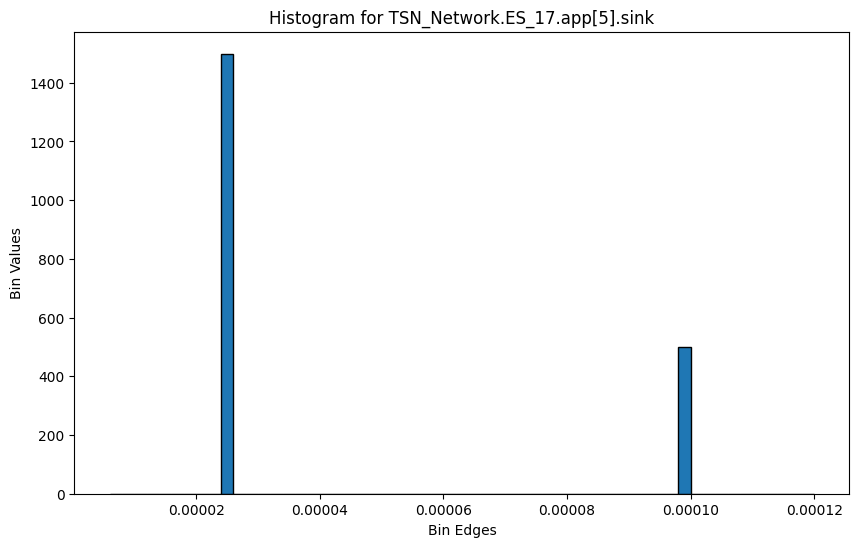

In [45]:
# Function to plot binedges and binvalues
def plot_histogram(data, module_name):
    for item in data:
        if item['module'] == module_name:
            plt.figure(figsize=(10, 6))
            plt.bar(item['binedges'][:-1], item['binvalues'], width=np.diff(item['binedges']), edgecolor='black', align='edge')
            plt.xlabel('Bin Edges')
            plt.ylabel('Bin Values')
            plt.title(f"Histogram for {module_name}")
            plt.show()

# Plot histogram for a specific module
plot_histogram(extracted_data, 'TSN_Network.ES_17.app[5].sink')

In [82]:
def find_highest_non_null_binedge(data):
    highest_binedge = 0.0
    highest_value = 0
    module_name = None
    for item in data:
        binedges = item['binedges']
        binvalues = item['binvalues']
        for edge, value in zip(binedges, binvalues):
            if value != 0 and (edge >= highest_binedge):
                highest_binedge = edge
                highest_value = value
                module_name = item['module']
    return highest_binedge, highest_value, module_name

# Find the highest binedge for which binvalue is non-null
highest_binedge, highest_value, module_name = find_highest_non_null_binedge(extracted_data)
print("Highest binedge with non-null binvalue:", highest_binedge)
print("Highest value:", highest_value)
print("Module name:", module_name)

Highest binedge with non-null binvalue: 0.00051
Highest value: 499
Module name: TSN_Network.ES_2.app[3].sink


In [54]:
# Aggregate data from all histograms
aggregated_data = {}
for item in extracted_data:
    for edge, value in zip(item['binedges'], item['binvalues']):
        if edge in aggregated_data:
            aggregated_data[edge] += value
        else:
            aggregated_data[edge] = value
            
sorted_edges = sorted(aggregated_data.keys())
sorted_values = [aggregated_data[edge] for edge in sorted_edges]

print("Aggregated Histogram Data:")
print("Bin Edges:", sorted_edges)
print("Bin Values:", sorted_values)

Aggregated Histogram Data:
Bin Edges: [0, 2e-06, 4e-06, 5e-06, 6e-06, 8e-06, 1e-05, 1.2e-05, 1.4e-05, 1.5e-05, 1.6e-05, 1.79e-05, 1.8e-05, 1.81e-05, 1.82e-05, 1.83e-05, 1.84e-05, 1.85e-05, 1.86e-05, 1.87e-05, 1.88e-05, 1.89e-05, 1.9e-05, 1.91e-05, 1.92e-05, 1.93e-05, 1.94e-05, 1.95e-05, 1.96e-05, 1.97e-05, 1.98e-05, 1.99e-05, 2e-05, 2.01e-05, 2.02e-05, 2.03e-05, 2.04e-05, 2.05e-05, 2.06e-05, 2.07e-05, 2.08e-05, 2.09e-05, 2.1e-05, 2.11e-05, 2.12e-05, 2.13e-05, 2.14e-05, 2.15e-05, 2.16e-05, 2.17e-05, 2.18e-05, 2.19e-05, 2.2e-05, 2.21e-05, 2.22e-05, 2.23e-05, 2.24e-05, 2.25e-05, 2.26e-05, 2.27e-05, 2.28e-05, 2.29e-05, 2.3e-05, 2.31e-05, 2.32e-05, 2.33e-05, 2.34e-05, 2.35e-05, 2.36e-05, 2.37e-05, 2.38e-05, 2.39e-05, 2.4e-05, 2.41e-05, 2.42e-05, 2.43e-05, 2.44e-05, 2.45e-05, 2.46e-05, 2.47e-05, 2.48e-05, 2.49e-05, 2.5e-05, 2.6e-05, 2.7e-05, 2.8e-05, 2.9e-05, 3e-05, 3.1e-05, 3.2e-05, 3.3e-05, 3.4e-05, 3.5e-05, 3.6e-05, 3.7e-05, 3.8e-05, 3.9e-05, 4e-05, 4.1e-05, 4.2e-05, 4.3e-05, 4.4e-05, 4.5

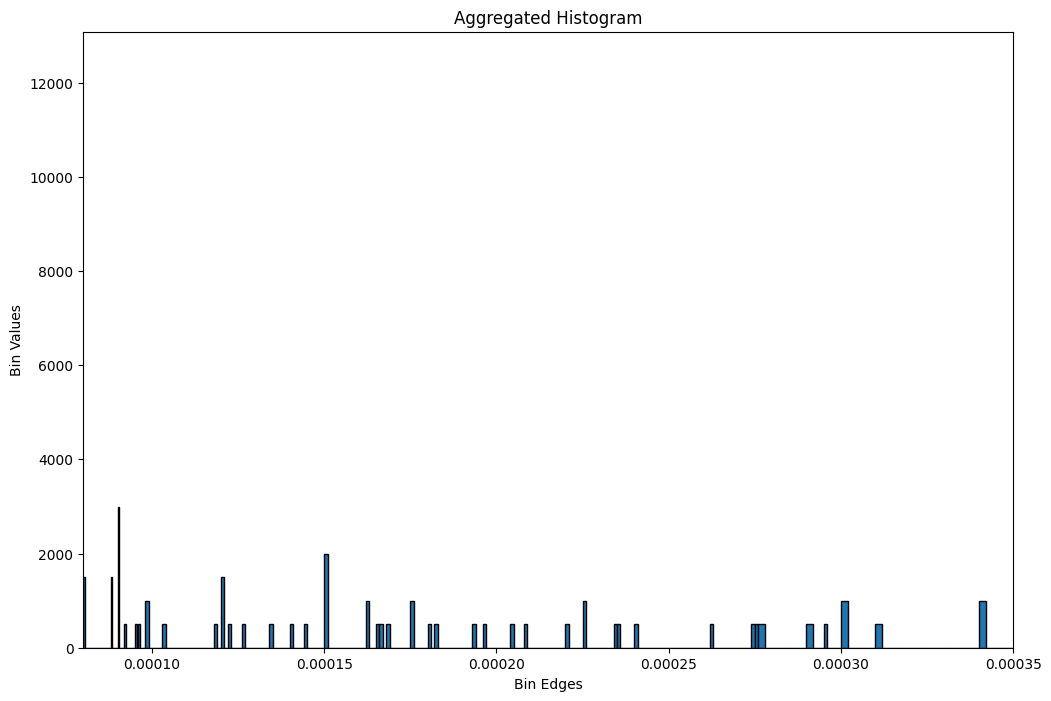

In [63]:
# Plot the aggregated histogram data with zoomed x-axis
plt.figure(figsize=(12, 8))
plt.bar(sorted_edges, sorted_values, width=np.diff(sorted_edges, append=sorted_edges[-1]), edgecolor='black', align='edge')
plt.xlabel('Bin Edges')
plt.ylabel('Bin Values')
plt.title('Aggregated Histogram')
plt.xlim(8e-05, 0.00035)  # Set the x-axis limits to zoom in on the relevant values
plt.show()